The Correct Label is shown above each image:


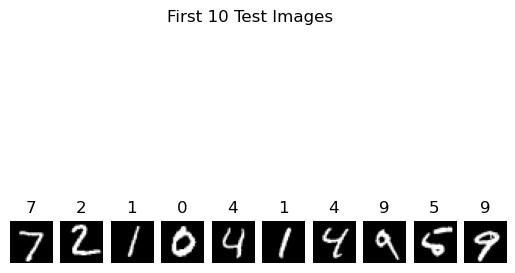

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_141 (Conv2D)             │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_94 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_142 (Conv2D)             │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_95 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_143 (Conv2D)             │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_47 (Flatten)            │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8674 - loss: 0.4136
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9837 - loss: 0.0535
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9890 - loss: 0.0344
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9907 - loss: 0.0288
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9937 - loss: 0.0190
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9872 - loss: 0.0365
Test Accuracy Before Compression: 0.9911999702453613
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1911 - loss: 2.3763
Test Accuracy After Compression: 0.19509999454021454
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8699 - loss: 0.4302
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9832 - loss: 0.0519
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9882 - loss: 0.0382
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - ac

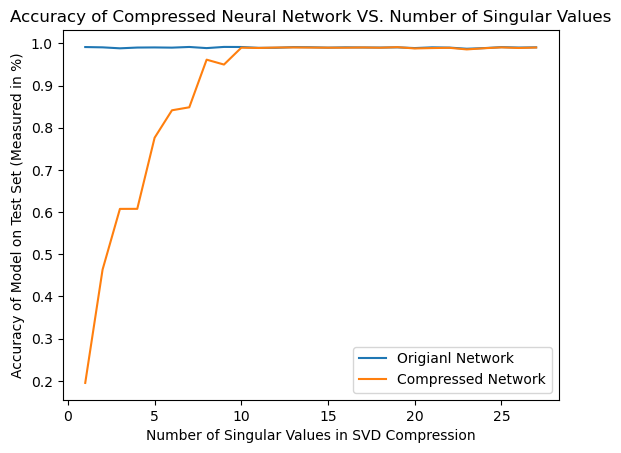

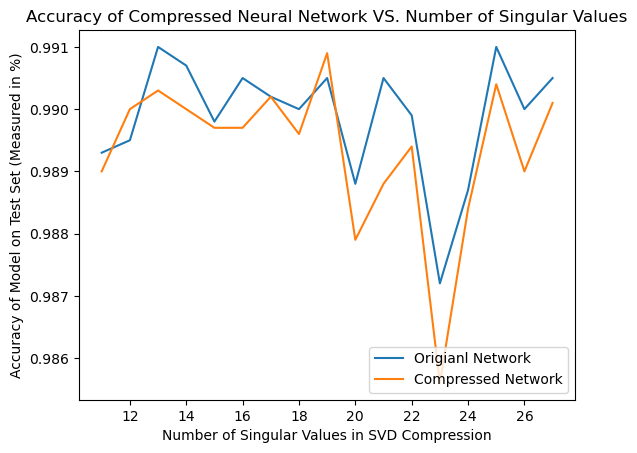

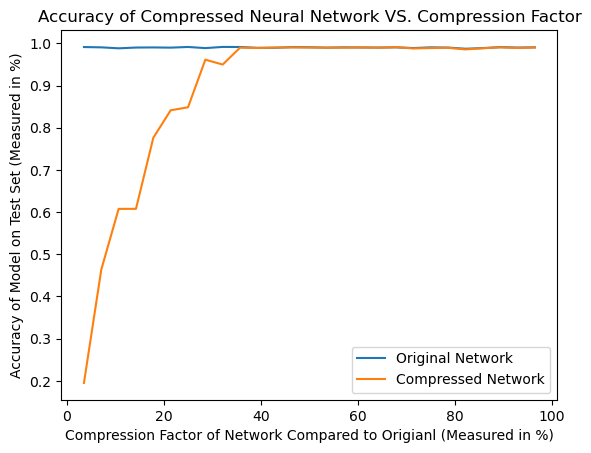

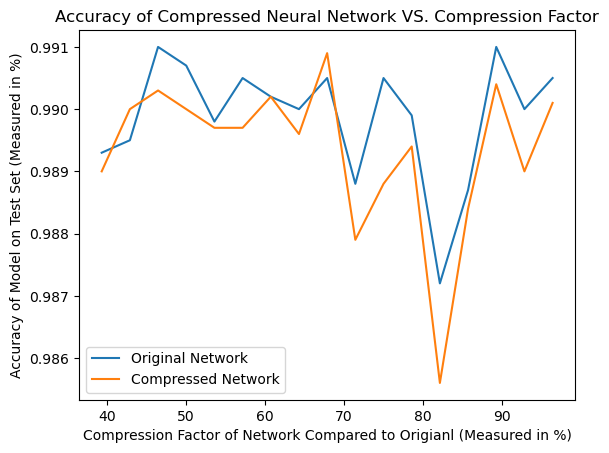

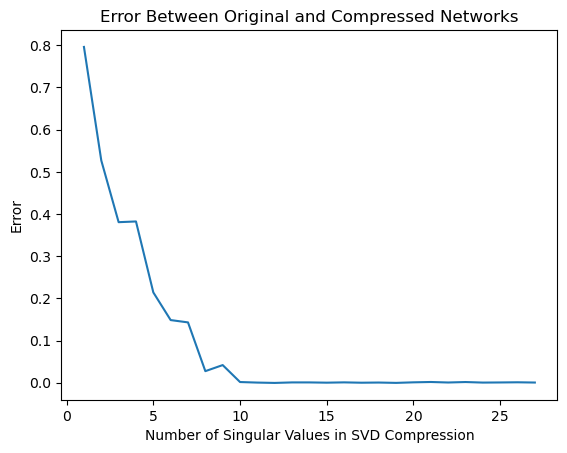

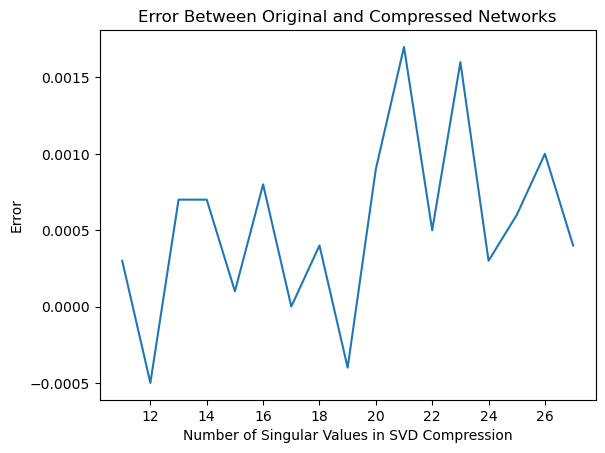

The Predicted label is shown above each image:


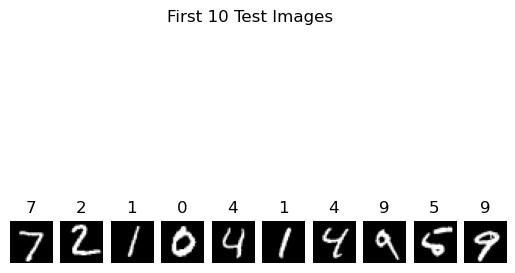

In [27]:
#This Python (Jupyter/ipynb) File demonstrates the size compression of a neural network using Singulvar Value Decomposition
#and tests the classification accuracy compared to the full neural network model. The Network uses the mnist
#dataset to classify the numbers 0-9.

#Imports the needed commands and files from Python and Tensorflow
#NOTE: Must pip install tensorflow scikit-learn in order to run
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

#Define a function which compresses the weights of the neural network
def compress_layer_weights(layer_index, num_singular_values, test_images):
    # Get the weights of the specified layer
    layer_weights = model.layers[layer_index].get_weights()[0]  # Assuming weights are at index 0

    # Perform Singular Value Decomposition (SVD)
    U, S, Vt = np.linalg.svd(layer_weights)

    # Compress the weights using the specified number of singular values
    compressed_weights = np.dot(U[:, :num_singular_values], np.dot(np.diag(S[:num_singular_values]), Vt[:num_singular_values, :]))

    # Set the compressed weights back to the layer
    model.layers[layer_index].set_weights([compressed_weights, model.layers[layer_index].get_weights()[1]])

    # Evaluate the compressed model on the test set
    _, compressed_test_acc = model.evaluate(test_images, test_labels)
    return compressed_test_acc

#Define empty lists to store information for plotting
original_accuracy=[]
compressed_accuracy=[]
size=[]
compression_factor=[]
error=[]
pred_labels=[]

# Load and preprocess the msnit dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

#Show the first 10 images in the test set before any network application
print("The Correct Label is shown above each image:")
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(test_labels[i])
    plt.axis('off')
plt.suptitle("First 10 Test Images")
plt.show()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images for CNN input (add a channel dimension)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

#Run a loop for all possible singular values, 28 is the maximum as it is the size of the images
for K in range(1,28):

    #Add the data for the x-axis of plotting
    size.append(K)
    compression_factor.append((K/28)*100)
    
    # Define the CNN architecture
    model = Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    # Display the model architecture
    if (K==1):
        model.summary()

    # Train the model
    model.fit(train_images, train_labels, epochs=5, batch_size=64, verbose=1)

    # Evaluate the model on the test set before compression
    o_loss, o_accuracy = model.evaluate(test_images, test_labels)
    print(f"Test Accuracy Before Compression: {o_accuracy}")
    original_accuracy.append(o_accuracy)

    # Compress the last dense layer and test on the test set
    c_accuracy = compress_layer_weights(-2, K, test_images)
    print(f"Test Accuracy After Compression: {c_accuracy}")
    compressed_accuracy.append(c_accuracy)
    error.append(o_accuracy-c_accuracy)

    #Run a loop to calculate the predicted labels for the lowest instance of the highest accuracy
    #K-best rank
    if (K==10):
        # Get predicted labels from the compressed model for the first 10 test images
        for i in range(10):
            # Get the prediction from the model
            pred = model.predict(test_images[i:i+1])  # Predict for a single image
            predicted_label = np.argmax(pred)  # Get the index of the highest probability
            pred_labels.append(predicted_label)
        

#Plots the comparison graphs of accuracy's
plt.plot(size,original_accuracy)
plt.plot(size,compressed_accuracy)
plt.title('Accuracy of Compressed Neural Network VS. Number of Singular Values')
plt.ylabel('Accuracy of Model on Test Set (Measured in %)')
plt.xlabel('Number of Singular Values in SVD Compression')
plt.legend(['Original Network', 'Compressed Network'], loc='lower right')
plt.show()

#Plots the comparison graphs of accuracy's zoomed in on where the accuracy is similar
plt.plot(size[10:],original_accuracy[10:])
plt.plot(size[10:],compressed_accuracy[10:])
plt.title('Accuracy of Compressed Neural Network VS. Number of Singular Values')
plt.ylabel('Accuracy of Model on Test Set (Measured in %)')
plt.xlabel('Number of Singular Values in SVD Compression')
plt.legend(['Original Network', 'Compressed Network'], loc='lower right')
plt.show()

#Plots the comparison graphs of accuracy's
plt.plot(compression_factor,original_accuracy)
plt.plot(compression_factor,compressed_accuracy)
plt.title('Accuracy of Compressed Neural Network VS. Compression Factor')
plt.ylabel('Accuracy of Model on Test Set (Measured in %)')
plt.xlabel('Compression Factor of Network Compared to Origianl (Measured in %)')
plt.legend(['Original Network', 'Compressed Network'])
plt.show()

#Plots the comparison graphs of accuracy's zoomed in on where the accuracy is similar
plt.plot(compression_factor[10:],original_accuracy[10:])
plt.plot(compression_factor[10:],compressed_accuracy[10:])
plt.title('Accuracy of Compressed Neural Network VS. Compression Factor')
plt.ylabel('Accuracy of Model on Test Set (Measured in %)')
plt.xlabel('Compression Factor of Network Compared to Origianl (Measured in %)')
plt.legend(['Original Network', 'Compressed Network'])
plt.show()

#Plots the error graph between the accuracy's
plt.plot(size,error)
plt.title('Error Between Original and Compressed Networks')
plt.ylabel('Error')
plt.xlabel('Number of Singular Values in SVD Compression')
plt.show()

#Plots the error graph between the accuracy's zoomed in on where the accuracy is similar
plt.plot(size[10:],error[10:])
plt.title('Error Between Original and Compressed Networks')
plt.ylabel('Error')
plt.xlabel('Number of Singular Values in SVD Compression')
plt.show()

#Plots the predicted label with the images of the test set
print("The Predicted label is shown above each image:")
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(pred_labels[i])
    plt.axis('off')
plt.suptitle("First 10 Test Images")
plt.show()